Image Translation


Image Rotate


Image Resize


Image Flipping


Image Croping

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Reading the image.

In [2]:
image_data = cv2.imread("../content/Final image.PNG")

 We can  change the color space of the image. For example, the image we have read is in BGR color space.

There are various color spaces available in the package. Here we have changed the space using the cv2.COLOR_BGR2GRAY function. Converting the image color space BGR to RGB.

In [3]:
def catimageShow(imageTitle, image):
    if len(image.shape) == 3:
        imageVariable = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     if image.shape[2] == 1:
#     imageVariable = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    plt.figure(figsize=(4, 2))
    plt.imshow(imageVariable)
    plt.title(imageTitle)
    plt.show()

Displaying the image

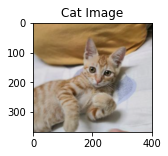

In [4]:
catimageShow("Cat Image", image_data)

Here we have seen when we read an image using OpenCV by default, its color space is set on the BGR color space and using the function, we can change the colour space.

From the above lines of codes, you can read and display whatever image you want

Checking the data structure:


print(image.shape)

print(image.size)

print(type(image))


In [28]:
print(image_data.shape)

(367, 402, 3)


In [29]:
print(image_data.size)

442602


In [30]:
print(type(image_data))

<class 'numpy.ndarray'>


Here we can see the shape and size of the image. Since OpenCV uses a NumPy data structure to store the images, it shows the type of data as numpy.ndarray.

we will see how we can perform editing in any image structure. The first thing we are performing is called image translation.

Image Translation

In computer vision or image processing, shifting an image into a frame is considered as the image translation.

In [5]:
#(1, 0) (0, 1)

translationx = 10
translationY = 150
ModifiedImage = np.float32([[1, 0, translationx], 
                           [0, 1, translationY]])

In [6]:
ModifiedImage

array([[  1.,   0.,  10.],
       [  0.,   1., 150.]], dtype=float32)

In [7]:
imageShift = cv2.warpAffine(image_data, ModifiedImage,
                            (image_data.shape[1], image_data.shape[0]))

Here in the output, we can see that we have shifted the image in the frame. To understand the code part first, we need to go through the warpaffine function. It takes a matrix as a parameter in the matrix we give x = 10, which means we are telling the function to shift the image 10 units on the right side and y= 150, which means we are telling the function to shift the image 150 units downwards.  

In the fourth argument(image_data.shape[1], image_data.shape[0]), where we mentioned the num_cols and num_rows, we told the function to crop the image by one units from  x sides.

Displaying the translated image:

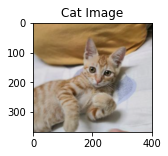

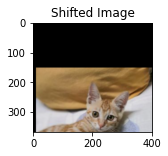

In [8]:
catimageShow("Cat Image", image_data)
catimageShow("Shifted Image",imageShift)

In [9]:
def imageTranslation(image, translationX, translationY):
    modifiedImage = np.float32([[1, 0, translationX], 
                           [0, 1, translationY]])
    
    imageShift = cv2.warpAffine(image_data, modifiedImage,
                            (image_data.shape[1], image_data.shape[0]))
    
    catimageShow("Cat Image", image_data)
    catimageShow("Shifted Image",imageShift)

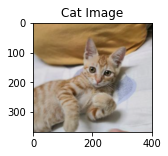

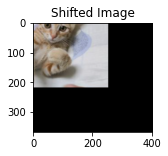

In [10]:
imageTranslation(image_data, -150, -150)

Image Rotation.

In this section we will try to rotate the image by a certain angle:

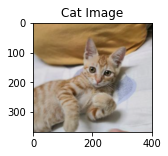

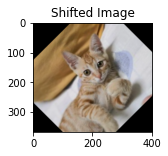

In [11]:
imageCenter = (image_data.shape[1]//2, image_data.shape[0]//2) # we use // for geting integer value
imageRotate = cv2.getRotationMatrix2D(imageCenter, 45, 1) # 2D array
finalRotate = cv2.warpAffine(image_data, imageRotate,
                            (image_data.shape[1], image_data.shape[0]))
catimageShow("Cat Image", image_data)
catimageShow("Shifted Image",finalRotate)

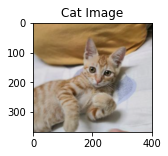

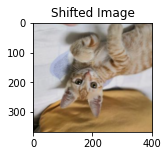

In [12]:
imageCenter = (image_data.shape[1]//2, image_data.shape[0]//2)
imageRotate = cv2.getRotationMatrix2D(imageCenter, 180, 1) #for center 1 is fixed
finalRotate = cv2.warpAffine(image_data, imageRotate,
                            (image_data.shape[1], image_data.shape[0]))
catimageShow("Cat Image", image_data)
catimageShow("Shifted Image",finalRotate)

In [13]:
def imageRotation():
    imageCenter = (image_data.shape[1]//2, image_data.shape[0]//2)
    imageRotate = cv2.getRotationMatrix2D(imageCenter, 45, 1)
    finalRotate = cv2.warpAffine(image_data, imageRotate,
                                (image_data.shape[1], image_data.shape[0]))
    catimageShow("Cat Image", image_data)
    catimageShow("Shifted Image",finalRotate)

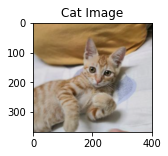

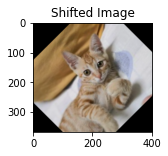

In [27]:
imageRotation()

In [15]:
image_data.shape

(367, 402, 3)

Image Scaling


This is a commonly used method in the computer vision and image processing area where we try to resize the image according to the requirement. Roughly we perform two things in the image scaling:

 either we enlarge the image or we shrink the image; in OpenCV, we have function resize; using this, we can perform the scaling of the image.

In [16]:
def imageResize(image_data, imageSize):
    imageResize = cv2.resize(image_data, (imageSize, imageSize), interpolation = cv2.INTER_AREA)
    print("Before Resize Image Shape is : {}".format(image_data.shape))
    catimageShow("Cat Image", image_data)
    print("After Resize Image Shape is : {}".format(imageResize.shape))
    catimageShow("Resize Image",imageResize)

We had used INTER_AREA interpolation when we were shrinking the image, and then we used CUBIC interpolation when enlarging the image so that the quality of pixels will not be harmed while resizing.

Before Resize Image Shape is : (367, 402, 3)


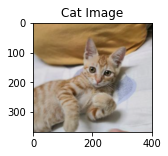

After Resize Image Shape is : (120, 120, 3)


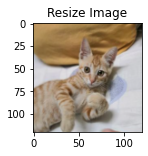

In [17]:
imageResize(image_data, 120)

OpenCV-Python is a library of programming functions mainly aimed at real-time computer vision. cv2.flip() method is used to flip a 2D array. The function cv::flip flips a 2D array around vertical, horizontal, or both axes.

Syntax: cv2.flip(src, flipCode[, dst] )

Parameters: src: Input array.

dst: Output array of the same size and type as src.

flip code: A flag to specify how to flip the array; 0 means flipping around the x-axis and positive value (for example, 1) means flipping around y-axis. Negative value (for example, -1) means flipping around both axes.

In [19]:
def imageFlipping(image_data):
    imageResize = cv2.flip(image_data, 0)
    print("Before Flipping Image")
    catimageShow("Cat Image", image_data)
    print("After Flipping Image")
    catimageShow("Resize Image",imageResize)

Before Flipping Image


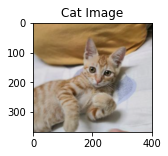

After Flipping Image


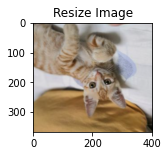

In [20]:
imageFlipping(image_data)

In [21]:
def imageCropping(image_data):
    imageResize = image_data[100:200, 100:200] # (x axis:yaxis, x axis:yaxis)
    print("Before Image Crop")
    catimageShow("Cat Image", image_data)
    print("After Image Crop")
    catimageShow("Resize Image",imageResize)

Before Image Crop


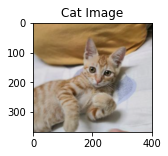

After Image Crop


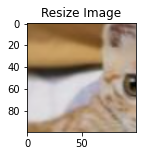

In [22]:
imageCropping(image_data)

References

Google.